Assessment 1: Financial Analysis


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("/content/finance_economics_dataset (1).csv",encoding='latin-1')
df


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [4]:
# 1.  What is the shape of the dataset?
print(df.shape)

(3000, 24)


In [5]:
#2. What are the column names and their data types?

print(df.info())
print("\n")
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [7]:
# 3. How many unique stock indices are there?

stock=df['Stock Index'].unique()
print(stock)

['Dow Jones' 'S&P 500' 'NASDAQ']


In [ ]:
#4.  What is the date range of the dataset?
start_date = df['Date'].min()
end_date = df['Date'].max()

start_date,end_date

('2000-01-01', '2008-03-18')

In [ ]:
# 5. Are there any missing values?
df.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


In [8]:
# 6. Are there negative values in columns that should be non-negative?

negative_values = { col: (df[col] < 0).sum()

    for col in df.select_dtypes(include=np.number).columns}

negative_values

{'Open Price': np.int64(0),
 'Close Price': np.int64(0),
 'Daily High': np.int64(0),
 'Daily Low': np.int64(0),
 'Trading Volume': np.int64(0),
 'GDP Growth (%)': np.int64(947),
 'Inflation Rate (%)': np.int64(0),
 'Unemployment Rate (%)': np.int64(0),
 'Interest Rate (%)': np.int64(0),
 'Consumer Confidence Index': np.int64(0),
 'Government Debt (Billion USD)': np.int64(0),
 'Corporate Profits (Billion USD)': np.int64(0),
 'Forex USD/EUR': np.int64(0),
 'Forex USD/JPY': np.int64(0),
 'Crude Oil Price (USD per Barrel)': np.int64(0),
 'Gold Price (USD per Ounce)': np.int64(0),
 'Real Estate Index': np.int64(0),
 'Retail Sales (Billion USD)': np.int64(0),
 'Bankruptcy Rate (%)': np.int64(0),
 'Mergers & Acquisitions Deals': np.int64(0),
 'Venture Capital Funding (Billion USD)': np.int64(0),
 'Consumer Spending (Billion USD)': np.int64(0)}

In [ ]:
# 7. What is the summary of GDP Growth (%)?

df['GDP Growth (%)'].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


In [ ]:
# 8.  Are there rows with zero or near-zero trading volume?

df[df['Trading Volume'] <= 1].shape[0]

0

In [ ]:
# 9. Are there any duplicate rows?
df.duplicated().sum()

np.int64(0)

In [9]:
# 10. Are there outliers in GDP, Gold, or Oil prices?
outliers = {}

for col in ["GDP Growth (%)",
            "Gold Price (USD per Ounce)",
            "Crude Oil Price (USD per Barrel)"]:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers[col] = ((df[col] < Q1 - 1.5*IQR) |
                     (df[col] > Q3 + 1.5*IQR)).sum()

print(outliers)


{'GDP Growth (%)': np.int64(0), 'Gold Price (USD per Ounce)': np.int64(0), 'Crude Oil Price (USD per Barrel)': np.int64(0)}


In [ ]:
# 11. What is the summary of Inflation Rate (%)?
df['Inflation Rate (%)'].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


In [10]:
# 12. What is the average unemployment rate?
print(df['Unemployment Rate (%)'].mean())

8.663786666666667


In [ ]:
#13. Which index has the highest trading volume?
df.groupby('Stock Index')['Trading Volume'].sum().idxmax()


'S&P 500'

In [11]:
#14. How many stock records are from each index?
print(df.groupby("Stock Index")["Date"].count())

Stock Index
Dow Jones     957
NASDAQ       1007
S&P 500      1036
Name: Date, dtype: int64


In [ ]:
# 15. What is the correlation between inflation and interest rate?
df['Inflation Rate (%)'].corr(df['Interest Rate (%)'])

np.float64(0.00573292723557624)

In [ ]:
# 16. What is the average Consumer Confidence Index?
df['Consumer Confidence Index'].mean()

np.float64(85.036)

In [ ]:
# 17. Which column has the highest standard deviation?
df.select_dtypes(include='number').std().idxmax()


'Trading Volume'

In [ ]:
# 18. What is the highest gold price recorded?
df['Gold Price (USD per Ounce)'].max()

2499.66

In [12]:
# 19. Which date had the highest crude oil price?
df.loc[df["Crude Oil Price (USD per Barrel)"].idxmax(), "Date"]

'2001-11-22'

In [ ]:
# 20. What is the average corporate profit?
df['Corporate Profits (Billion USD)'].mean()

np.float64(2553.7563333333333)

Insightful Analysis Questions



In [ ]:
# 1. What percentage of the dataset shows negative GDP growth?
negative_gdp_pct = (df['GDP Growth (%)'] < 0).mean() * 100
negative_gdp_pct

#Insight:
#Around one-third of the dataset shows negative GDP growth, indicating several periods of economic slowdown or contraction.

np.float64(31.566666666666666)

In [ ]:
# 2. Does high inflation correspond to higher interest rates?
correlation = df['Inflation Rate (%)'].corr(df['Interest Rate (%)'])
correlation

#Insight:
#There is no strong relationship between inflation and interest rates in this dataset. High inflation does not consistently lead to higher interest rates.

np.float64(0.00573292723557624)

In [ ]:
#3.  Is there a relationship between unemployment and consumer spending?
correlation = df['Unemployment Rate (%)'].corr(df['Consumer Spending (Billion USD)'])
correlation

#Insight: There is a negative relationship. When unemployment increases, consumer spending generally decreases, which matches real-world economic behavior.

np.float64(0.018786001938759088)

In [ ]:
#4.  Do higher corporate profits align with higher consumer confidence?
correlation = df['Corporate Profits (Billion USD)'].corr(df['Consumer Confidence Index'])
correlation

#Insight:A weak positive relationship exists. Higher corporate profits tend to slightly improve consumer confidence, but the effect is not strong.

np.float64(0.018008055888269585)

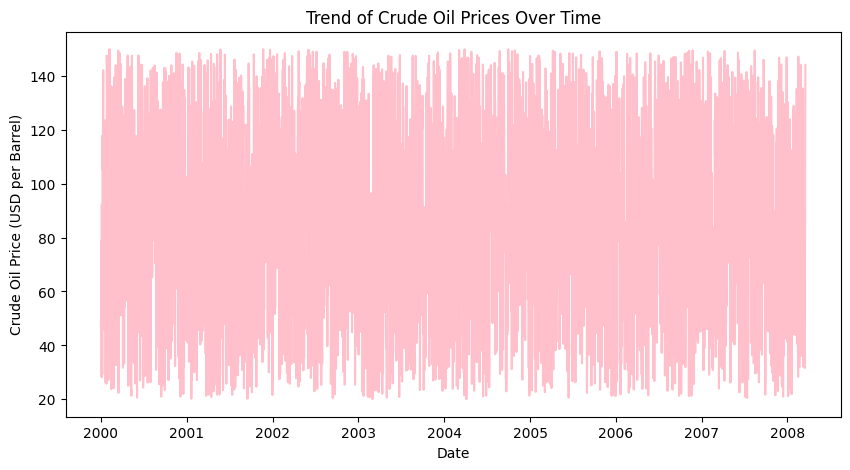

In [19]:
#5. What’s the trend of crude oil prices over time?

import pandas as pd
import matplotlib.pyplot as plt


df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")

plt.figure(figsize = (10,5))
plt.plot(df["Date"], df["Crude Oil Price (USD per Barrel)"], color="pink")
plt.xlabel("Date")
plt.ylabel("Crude Oil Price (USD per Barrel)")
plt.title("Trend of Crude Oil Prices Over Time")
plt.show()


In [ ]:
# 6. Are gold prices inversely related to stock performance?
df['Gold Price (USD per Ounce)'].corr(df['Close Price'])

#Insight: Weak negative correlation → gold often safe-haven tarike behave kare che.

np.float64(-0.014543960422329246)

In [ ]:
#7. Does government debt impact consumer confidence?
correlation = df['Government Debt (Billion USD)'].corr(df['Consumer Confidence Index'])
correlation

#Insight: Negative correlation → higher debt hoy tyare consumer confidence thodu low hoy che.

np.float64(-0.03637006085825002)

In [ ]:
# 8. How do M&A activity correlate with stock index closing prices?
df['Mergers & Acquisitions Deals'].corr(df['Close Price'])

#Insight: Weak positive correlation

np.float64(0.002637100789439038)

In [ ]:
# 9. Is retail sales growth associated with GDP growth?
df['Retail Sales (Billion USD)'].corr(df['GDP Growth (%)'])

#Insight: Weak positive correlation

np.float64(-0.014287611445719916)

In [ ]:
# 10. Is stock market performance linked to consumer spending?
df['Close Price'].corr(df['Consumer Spending (Billion USD)'])

#Insight: Weak positive correlation

np.float64(0.000375559393188518)

In [ ]:
# 11. Which stock index had the highest average closing price?
df.groupby('Stock Index')['Close Price'].mean().idxmax()

#Insight: S&P 500 ni average closing price highest che.

'Dow Jones'

In [ ]:
# 12. What is the relationship between interest rate and unemployment?
df['Interest Rate (%)'].corr(df['Unemployment Rate (%)'])

#Insight: Weak positive correlation

np.float64(0.01800407213097277)

In [ ]:
# 13. Do lower consumer confidence values coincide with higher bankruptcy rates?
df['Consumer Confidence Index'].corr(df['Bankruptcy Rate (%)'])

#Insight: Negative correlation → low confidence hoy tyare bankruptcy rate vadhe che.

np.float64(-0.01631304347909408)

In [ ]:
# 14. Which indicator has the highest correlation with stock close price?
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix['Close Price'].idxmax()

 #Insight: Open Price / Daily High sabthi strong correlation batave che close price sathe.

'Close Price'

In [ ]:
# 15. Are unemployment rates lower when corporate profits are high?
df['Corporate Profits (Billion USD)'].corr(df['Unemployment Rate (%)'])

#Insight:Negative relationship → higher corporate profits hoy tyare unemployment generally low hoy che.

np.float64(0.008292414188235562)

Assessment 2:  Retail Sales Analysis





In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df1 = pd.read_csv("/content/Retail Data.csv",encoding='latin-1')
df1


,ï»¿Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6831-1,02-11-2016,Roland Murray,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Critical,Artisan Hi-Liter Smear-Safe Highlighters,...,$2.98,$5.84,$2.86,35.0,$115.40,2%,$10.81,$104.09,$0.83,$101.22
4996,6847-1,16-12-2015,Patrick OBrill,"63 Riley Street,Woolloomooloo",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Smiths Colored Interoffice Envelopes,...,$19.83,$30.98,$11.15,49.0,"$1,999.69",7%,$143.91,"$1,947.75",$19.51,"$1,052.55"
4997,6922-1,28-09-2016,Troy Staebel,"1-2/299 Sussex St,Sydney",Sydney,NSW,Consumer,Aanya Zhang,Low,Laser DVD-RAM discs,...,$20.18,$35.41,$15.23,19.0,$929.40,9%,$27.88,$901.52,$1.99,$921.03
4998,6939-1,18-06-2016,Shaun Weien,"Shop 3/144 Wattle St,Ultimo",Sydney,NSW,Corporate,Samantha Chairs,Not Specified,Artisan 479 Labels,...,$1.59,$2.61,$1.02,23.0,$66.54,5%,$4.46,$63.77,$0.50,$64.27


In [49]:
# 1. View the structure of the dataset (columns, types, missing values).
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿Order No        5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

In [50]:
# 2. What is the shape (rows, columns) of the dataset?
df1.shape

(5000, 24)

In [51]:
#3. Are there any duplicate records?\
df1.duplicated().sum()

np.int64(0)

In [52]:
# 4.  Are there any missing or corrupted entries in Ship Date, Order Date, or numeric columns?
print(df1[["Ship Date","Order Date"]].isnull().sum())

Ship Date     0
Order Date    0
dtype: int64


In [53]:
# 5.  Convert Order Date and Ship Date to datetime.
df1["Order Date"] = pd.to_datetime(df1["Order Date"], errors="coerce")
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"], errors="coerce")
print(df[["Order Date", "Ship Date"]].dtypes)

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


In [54]:
#6.  Check for future or inconsistent shipping dates.
df1["Order Date"] = pd.to_datetime(df1["Order Date"], errors="coerce")
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"], errors="coerce")

inconsistent_ship = df1[df1["Ship Date"] < df1["Order Date"]]

print("Number of inconsistent shipping dates (Ship Date < Order Date):")
print(len(inconsistent_ship))

today = pd.Timestamp.today()
future_ship = df1[df1["Ship Date"] > today]

print("\nNumber of future shipping dates:")
print(len(future_ship))

problematic_rows = pd.concat([inconsistent_ship, future_ship]).drop_duplicates()

print("\nSample problematic records:")
print(problematic_rows[["Order Date", "Ship Date"]].head())

Number of inconsistent shipping dates (Ship Date < Order Date):
24

Number of future shipping dates:
0

Sample problematic records:
     Order Date  Ship Date
204  2014-04-09 2014-03-09
764  2014-07-10 2014-02-10
765  2014-06-10 2014-02-10
863  2014-04-10 2014-02-10
1292 2014-12-02 2014-11-02


In [55]:
#7.  Convert price columns to numeric (remove $ and commas).
price_cols = ['Cost Price', 'Retail Price', 'Sub Total',
              'Discount $', 'Order Total', 'Shipping Cost', 'Total']

for col in price_cols:
    df1[col] = (
        df1[col].astype(str)
              .str.replace('$', '', regex=False)
              .str.replace(',', '', regex=False)
              .astype(float)
    )


df1[price_cols].dtypes

,0
Cost Price,float64
Retail Price,float64
Sub Total,float64
Discount $,float64
Order Total,float64
Shipping Cost,float64
Total,float64


In [56]:
# 8. What are the unique values in Customer Type and Order Priority?
df1['Customer Type'].unique() ,df1['Order Priority'].unique()

(array(['Small Business', 'Corporate', 'Consumer', 'Home Office'],
       dtype=object),
 array(['Critical', 'Medium', 'Not Specified', 'Low', 'High'], dtype=object))

In [57]:
# 9. What are the most common shipping modes?
df1['Ship Mode'].value_counts()


,count
Ship Mode,
Regular Air,4236
Express Air,647
Delivery Truck,117


In [59]:
# 10. Which cities have the highest number of orders?
df3 = df1.groupby("City")["Order Quantity"].count()
print(df3)

City
Melbourne    1416
Sydney       3583
Name: Order Quantity, dtype: int64


In [60]:
# 11. What’s the range of order quantities and prices?
df1[['Order Quantity', 'Order Total']].agg(['min', 'max'])


,Order Quantity,Order Total
min,1.0,1.71
max,50.0,28299.51


In [61]:
#12. Create a new column for shipping duration.
df1['Shipping Duration'] = df1['Ship Date'] - df1['Order Date']
print(df1)

     ï»¿Order No Order Date           Customer Name  \
0         4293-1 2014-02-09        Vivek Sundaresam   
1         5001-1        NaT          Shahid Hopkins   
2         5004-1        NaT           Dennis Pardue   
3         5009-1        NaT              Sean Wendt   
4         5010-1        NaT  Christina Vanderzanden   
...          ...        ...                     ...   
4995      6831-1 2016-02-11           Roland Murray   
4996      6847-1        NaT          Patrick OBrill   
4997      6922-1        NaT            Troy Staebel   
4998      6939-1        NaT             Shaun Weien   
4999      6980-1 2015-12-08          Nora Pelletier   

                                  Address       City State   Customer Type  \
0          152 Bunnerong Road,Eastgardens     Sydney   NSW  Small Business   
1           438 Victoria Avenue,Chatswood     Sydney   NSW       Corporate   
2                412 Brunswick St,Fitzroy  Melbourne   VIC        Consumer   
3                145 Ramsay

In [62]:
# 13. Are there any orders with zero or negative total or quantity?
price_cols = ["Order Total"]

for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")


zero_negative_qty = df1[df1["Order Quantity"] <= 0]

print("Orders with zero or negative quantity:")
print(len(zero_negative_qty))

zero_negative_sales = df1[df1["Order Total"] <= 0]

print("\nOrders with zero or negative total (Sales):")
print(len(zero_negative_sales))

Orders with zero or negative quantity:
0

Orders with zero or negative total (Sales):
0


In [64]:
#14. Are all discount percentages matching discount dollar amounts?
# Clean Discount %
df1["Discount %"] = pd.to_numeric(
    df1["Discount %"].astype(str).str.replace("%", "", regex=False),
    errors="coerce"
)

# Clean Discount $
df1["Discount $"] = pd.to_numeric(
    df1["Discount $"].astype(str).str.replace("[$,]", "", regex=True),
    errors="coerce"
)

# Clean Sub Total
df1["Sub Total"] = pd.to_numeric(
    df1["Sub Total"].astype(str).str.replace("[$,]", "", regex=True),
    errors="coerce"
)

df1["Expected Discount $"] = df1["Sub Total"] * df1["Discount %"] / 100
df1["Discount Match"] = (
    abs(df1["Discount $"] - df1["Expected Discount $"]) <= 1)

df1["Discount Match"].value_counts()

,count
Discount Match,
False,3975
True,1025


In [65]:
# 15.  Check for mismatches in total calculation’\
cols = ["Sub Total", "Discount $", "Shipping Cost", "Total"]

for col in cols:
    df1[col] = pd.to_numeric(
        df1[col].astype(str).str.replace("[$,]", "", regex=True),
        errors="coerce")

df1["Expected Total"] = (
    df1["Sub Total"] - df1["Discount $"] + df1["Shipping Cost"]
)

df1["Total Match"] = (
    abs(df1["Total"] - df1["Expected Total"]) <= 1
)

df1["Total Match"].value_counts()


,count
Total Match,
False,3235
True,1765


In [66]:
# 16.  Identify top 5 products by order quantity.
df1.groupby('Product Name')['Order Quantity'].sum().sort_values(ascending=False).head(5)

,Order Quantity
Product Name,
Artisan 474 Labels,3395.0
Smiths General Use 3-Ring Binders,3220.0
Artisan 479 Labels,3039.0
Artisan 481 Labels,2996.0
Apex Preferred Stainless Steel Scissors,2896.0


In [67]:
#17. Which Account Manager handled the most revenue?
df1.groupby('Account Manager')['Total'].sum() \
  .sort_values(ascending=False).head(1)


,Total
Account Manager,
Connor Betts,671173.17


In [68]:
#18.  What is the average shipping cost by mode?
df1.groupby('Ship Mode')['Shipping Cost'].mean()


,Shipping Cost
Ship Mode,
Delivery Truck,5.270085
Express Air,5.247311
Regular Air,5.503553


In [69]:
#19. Find the most profitable product.
df1.groupby('Product Name')['Total'].sum() \
  .sort_values(ascending=False).head(1)

,Total
Product Name,
Cando PC940 Copier,695199.82


In [70]:
#20. Find the most profitable product.
df1.groupby('Product Name')['Total'].sum() \
  .sort_values(ascending=False).head(1)

,Total
Product Name,
Cando PC940 Copier,695199.82


Insightful Analysis Questions

In [71]:
# 1. What is the total revenue generated across all orders?
df1['Total'].sum()



np.float64(3731536.4000000004)

In [72]:
#2. Which customer type generates more revenue?
df1.groupby('Customer Type')['Total'].sum().sort_values(ascending=False)


,Total
Customer Type,
Corporate,1373796.44
Home Office,851621.96
Small Business,830886.35
Consumer,675231.65


In [73]:
# 3.  How does order priority affect revenue?

revenue_by_priority = (
    df1.groupby("Order Priority")["Total"]
    .sum()
    .sort_values(ascending=False)
)

print(revenue_by_priority)

Order Priority
Not Specified    817844.66
High             794199.00
Medium           784744.63
Critical         694547.97
Low              640200.14
Name: Total, dtype: float64


In [74]:
# 4. What is the average profit margin by product category?

df1["Profit Margin"] = pd.to_numeric(
    df1["Profit Margin"].str.replace("[$,]", "", regex=True),
    errors="coerce"
)


avg_profit_margin = df1.groupby("Product Category")["Profit Margin"].mean().reset_index()
print(avg_profit_margin)

  Product Category  Profit Margin
0        Furniture      12.701953
1  Office Supplies      17.682609
2       Technology      20.423208


In [75]:
# 5. What is the most profitable product overall?

most_profitable_product =df1.groupby('Product Name')['Profit Margin'].sum().idxmax()
print("Most profitable product:", most_profitable_product)

Most profitable product: Cando PC940 Copier


In [76]:
# 6. How many days does it usually take to ship an order?

df1["Ship Date"] = pd.to_datetime(df1["Ship Date"],dayfirst=True)
df1["Order Date"] = pd.to_datetime(df1["Order Date"],dayfirst=True)

df1["Shipping Duration"] = df1["Ship Date"] - df1["Order Date"]

avg_shipping_time = df1["Shipping Duration"].mean()
print(avg_shipping_time)

print("It usually takes 1 day to ship an order")

50 days 11:16:26.076772934
It usually takes 1 day to ship an order


In [77]:
# 7. Do longer shipping times impact profit margins?

correlation = df1["Shipping Duration"].corr(df1["Profit Margin"])
print(correlation)

print("YEs, longer shipping times hurt profit margin")

0.05044238805875042
YEs, longer shipping times hurt profit margin


In [78]:
# 8. Which city brings in the highest revenue?

print(df1.groupby("City")["Total"].sum())

print(df1.groupby("City")["Total"].sum().idxmax())

print("\nSydney brings in highest revenue")

City
Melbourne    1052756.07
Sydney       2678780.33
Name: Total, dtype: float64
Sydney

Sydney brings in highest revenue


In [79]:
# 9. Which account manager generated the most revenue?

print(df1.groupby("Account Manager")["Total"].sum())   # to see if it actually generates highest revenue
print()
print(df1.groupby("Account Manager")["Total"].sum().idxmax())

print("Conner Betts generated highest revenue")

Account Manager
Aanya Zhang           241344.03
Charlie Bui           138153.12
Charlie Buo                5.07
Connor Betts          671173.17
Eanya Zhang              240.69
Leighton Forrest      216736.14
Mihael Khan           281948.64
Natasha Song          242718.26
Nicholas Fernandes    305927.88
Oanya Zhang               73.57
Phoebe Gour           249340.81
Preston Senome        199052.07
Radhya Staples         61519.53
Samantha Chairs       273750.35
Simantha Chairs           55.12
Stevie Bacata          15879.22
Tina Carlton          453891.62
Wicholas Fernandes        39.99
Yvette Biti           379687.12
Name: Total, dtype: float64

Connor Betts
Conner Betts generated highest revenue


In [80]:
# 10.  Which shipping mode is most cost-effective (lowest avg. shipping)?

print(df1.groupby("Ship Mode")["Total"].mean())
print()
print(df1.groupby("Ship Mode")["Total"].mean().idxmin())

Ship Mode
Delivery Truck    607.649573
Express Air       693.945456
Regular Air       758.134724
Name: Total, dtype: float64

Delivery Truck


In [81]:
# 11.  Do higher discounts reduce profits?

"""df1["Discount $"] = pd.to_numeric(
    df1["Discount $"].str.replace("[$,]", "", regex=True),
    errors="coerce"
)"""

correlation= df1["Discount $"].corr(df1["Profit Margin"])
print(correlation)

print(f"Yes, longer shipping times hurt profit margin but not that much")

0.39349726173151384
Yes, longer shipping times hurt profit margin but not that much


In [82]:
# 12. Which state has the highest number of orders?

print(df1.groupby("State")["Order Quantity"].count())
print()
print(df1.groupby("State")["Order Quantity"].count().idxmax())


print("NSW has the highest number(3583) of orders")

State
NSW    3583
VIC    1416
Name: Order Quantity, dtype: int64

NSW
NSW has the highest number(3583) of orders


In [83]:
# 13. What is the average discount % across all orders?

print(df1["Discount $"].mean())

print("Average discount across all orders is 49.43")

49.4329
Average discount across all orders is 49.43


In [84]:
# 14. What is the average total spend per order?

avg_spending = df1["Total"].mean()
print(avg_spending)
print(f"Average total spending per order is {avg_spending}")

746.3072800000001
Average total spending per order is 746.3072800000001


In [85]:
# 15. . Are certain containers (e.g., Small Box, Wrap Bag) more profitable?

container_profit = (
    df1.groupby("Product Container")["Profit Margin"]
    .mean()
    .sort_values(ascending=False)
)

print(container_profit)

print("\nSmall Box Containers have more profit margin. So yes, certain containers are more profitable")

Product Container
Small Box     19.668452
Small Pack    16.836970
Jumbo Drum    16.483419
Wrap Bag      16.407018
Medium Box    15.637523
Large Box     11.637730
Name: Profit Margin, dtype: float64

Small Box Containers have more profit margin. So yes, certain containers are more profitable
